In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from network_model import *
from data import *

In [22]:
data = get_data()

train_data, test_data = split_data(data)
train_data = get_data()
x_train = train_data["Avg_Temp_Pre_Day"].to_numpy()
x_train = np.reshape(x_train, (np.shape(x_train)[0], 1))
y_train = train_data["Avg_Temp"].to_numpy()
y_train = np.reshape(y_train, (np.shape(y_train)[0], 1))

x_train = standardize(x_train, x_train)
y_train = standardize(y_train, y_train)

x_test = test_data["Avg_Temp_Pre_Day"].to_numpy()
y_test = test_data["Avg_Temp"].to_numpy()
network = NeuralNetwork(x_train[0:7].T, y_train[7], 2)

In [23]:
sum1 = 0
sum2 = 0
lenght = len(x_train)-7
y_output = []
y_pred = []
for i in range(lenght):
    network.train(x_train[i:i+7].T, y_train[i+7])
    y_output.append(y_train[i+7])
    y_pred.append(network.output[0])
    if i > 600:
        sum1 += (network.output - network.y)
        sum2 += pow((network.output - network.y), 2)

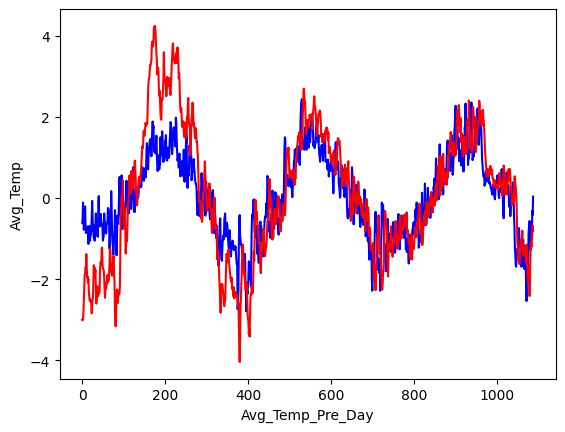

In [24]:
x = np.arange(lenght)
plt.plot(x, y_output, 'b')
plt.plot(x, y_pred, 'r')
plt.xlabel('Avg_Temp_Pre_Day')
plt.ylabel('Avg_Temp')
plt.show()

In [25]:
print(f"MSE: {sum2/lenght}")
print(f"MAE: {sum1/lenght}")

MSE: [[0.1743603]]
MAE: [[0.05400002]]
